In [1]:
#importing requiered liabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
f=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/breast_cancer_detection.csv")

In [3]:
f.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,...,34.24,66.5,330.6,0.1073,0.07158,0.0000,0.00000,0.2475,0.06969,NaN
337,897630,M,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,...,34.37,161.1,1873.0,0.1498,0.48270,0.4634,0.20480,0.3679,0.09870,NaN
147,86973701,B,14.950,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,...,25.47,107.1,809.7,0.0997,0.25210,0.2500,0.08405,0.2852,0.09218,NaN
563,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.1,1819.0,0.1407,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
371,9012568,B,15.190,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,15.73,104.5,819.1,0.1126,0.17370,0.1362,0.08178,0.2487,0.06766,NaN


In [4]:
f.drop("Unnamed: 32",axis=1,inplace=True)

In [5]:
f.shape

(569, 32)

In [6]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
f.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### visualization

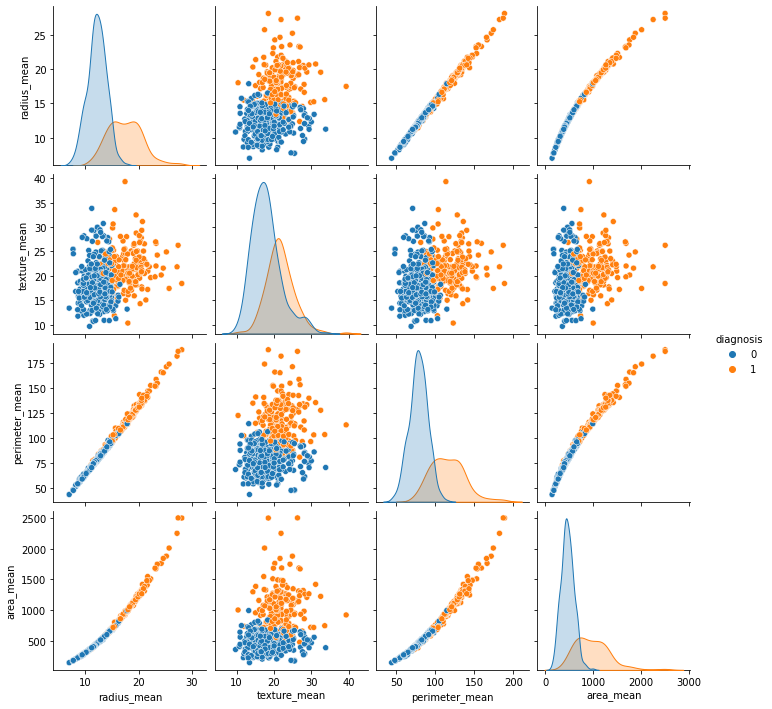

In [139]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
sns.pairplot(f[cols], hue="diagnosis")
plt.show()

B    357
M    212
Name: diagnosis, dtype: int64


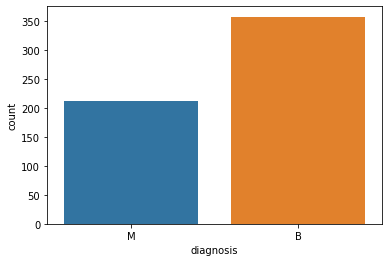

In [9]:
print(f['diagnosis'].value_counts())
sns.countplot('diagnosis', data=f);

In [11]:
f.drop('id',axis=1,inplace=True)

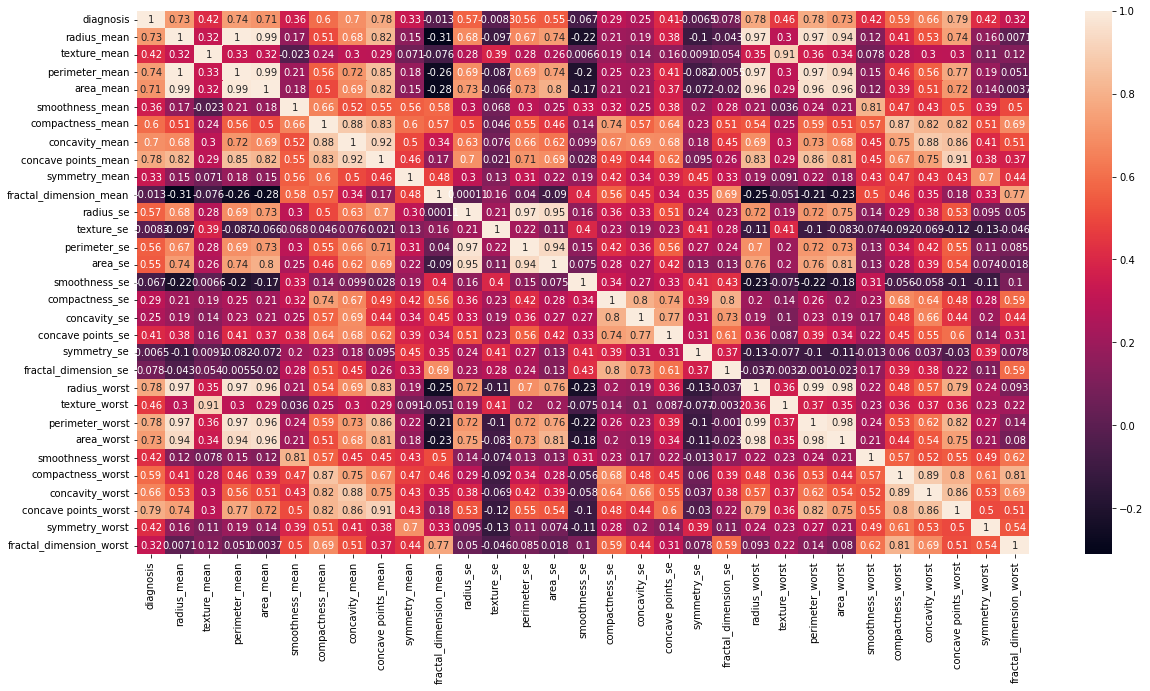

In [140]:
# correlation with target
plt.figure(figsize=(20,10));
sns.heatmap(f.corr(),annot=True);

In [12]:
f.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
f['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
f.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### Handling categorical data

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
f.diagnosis = le.fit_transform(f.diagnosis)

In [16]:
f.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
126,1,13.61,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,0.1761,...,16.89,35.64,113.20,848.7,0.1471,0.2884,0.37960,0.13290,0.347,0.07900
251,0,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,...,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.274,0.06487


In [17]:
col_to_use=['radius_mean', 'perimeter_mean','area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean','radius_se', 'perimeter_se', 'area_se', 
       'radius_worst', 'perimeter_worst', 'area_worst', 
       'compactness_worst', 'concavity_worst', 'concave points_worst']
print(len(col_to_use))

15


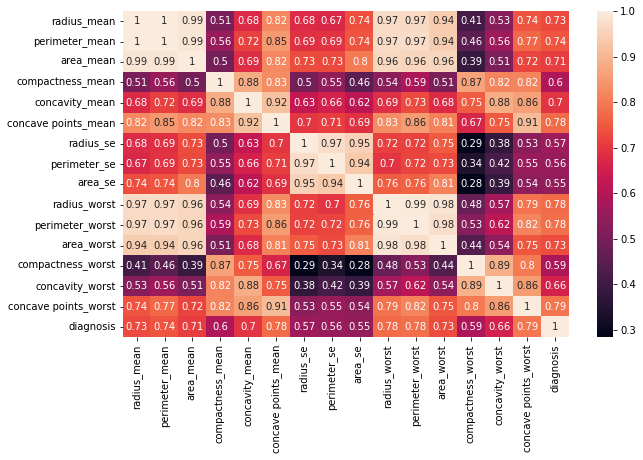

In [138]:
# heatmap for best correlation with our target variabel
col=['radius_mean', 'perimeter_mean','area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean','radius_se', 'perimeter_se', 'area_se', 
       'radius_worst', 'perimeter_worst', 'area_worst', 
       'compactness_worst', 'concavity_worst', 'concave points_worst','diagnosis']
plt.figure(figsize=(10,6))
sns.heatmap(f[col].corr(),annot=True);

### Logistic Regression

In [19]:
X=f[col_to_use]
y=f.diagnosis

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred=logreg.predict(X_test)

In [23]:
logreg.score(X_train,y_train)

0.9538461538461539

In [24]:
logreg.score(X_test,y_test)

0.9385964912280702

**KFold**

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [26]:
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(logreg,X_test,y_test,scoring='accuracy',cv=fold)
print(score)
print(abs(np.mean(score)))

[0.7826087  0.91304348 0.95652174 1.         0.86363636]
0.9031620553359684


**GridSearchCV**

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [29]:
solvers = ['lbfgs', 'liblinear']  
penalty = ['l2',"l1"]
c_values = [100, 10, 1.0, 0.1, 0.01]
#cv=list(range(1,10))

In [30]:
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [31]:
gs_model=GridSearchCV(logreg,param_grid=grid,cv=fold,verbose=1,return_train_score=True)

In [32]:
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, verbose=1)

In [33]:
print(gs_model.best_score_)
print(gs_model.best_params_)
print(gs_model.best_estimator_)

0.9538461538461538
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=100)


In [34]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C= 100, penalty= 'l2', solver= 'lbfgs')
regressor.fit(X_train, y_train)

LogisticRegression(C=100)

In [35]:
y_pred = regressor.predict(X_test)
lr_score=accuracy_score(y_test,y_pred)

In [36]:
print(lr_score)

0.9210526315789473


In [37]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[61,  6],
       [ 3, 44]])

In [38]:
precision_score_lr=(precision_score(y_test,y_pred))
recall_score_lr=(recall_score(y_test,y_pred))
f1_score_lr=(f1_score(y_test,y_pred))
roc_auc_score_lr=(roc_auc_score(y_test,y_pred))

In [39]:
print(precision_score_lr)
print(recall_score_lr)
print(f1_score_lr)
print(roc_auc_score_lr)

0.88
0.9361702127659575
0.9072164948453608
0.9233089869799936


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.88      0.94      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



### Support Vector

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC().fit(X_train,y_train)

In [43]:
y_pred=svc.predict(X_test)

In [44]:
svc_score=accuracy_score(y_test,y_pred)
svc_score

0.9298245614035088

**cross_validation**

In [45]:
from sklearn.metrics import *

In [46]:
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(svc,X_train,y_train,cv=fold)
print(score)
print(abs(np.mean(score)))

[0.89010989 0.92307692 0.9010989  0.9010989  0.9010989 ]
0.9032967032967033


**GridSearchCV**

In [47]:
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
kernel=['linear', 'rbf', 'sigmoid']
C=[0.1,0.01,0.001,1,10]
grid = dict(kernel=kernel ,C=C)

In [48]:
gs_model=GridSearchCV(estimator=SVC(),param_grid=grid,cv=fold,verbose=1,return_train_score=True)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=1)

In [49]:
print(gs_model.best_score_)
print(gs_model.best_params_)
print(gs_model.best_estimator_)

0.9472527472527472
{'C': 0.01, 'kernel': 'linear'}
SVC(C=0.01, kernel='linear')


In [50]:
svc=SVC(C=0.01, kernel='linear').fit(X_train,y_train)
y_pred=svc.predict(X_test)
svc_score=accuracy_score(y_test,y_pred)
print(svc_score)

0.9035087719298246


In [51]:
precision_score_svc=(precision_score(y_test,y_pred))
recall_score_svc=(recall_score(y_test,y_pred))
f1_score_svc=(f1_score(y_test,y_pred))
roc_auc_score_svc=(roc_auc_score(y_test,y_pred))

In [52]:
print(precision_score_svc)
print(recall_score_svc)
print(f1_score_svc)
print(roc_auc_score_svc)

0.86
0.9148936170212766
0.8865979381443299
0.905208002540489


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        67
           1       0.86      0.91      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



### KNeighborsClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
n_neighbors=[5,10,15,20,25,50,75,100]
params=dict(n_neighbors=n_neighbors)
gs_model=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,scoring='accuracy',cv=fold,verbose=1)


In [56]:
gs_model.fit(X_train,y_train)
print(gs_model.best_score_)
print(gs_model.best_params_)
print(gs_model.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.9340659340659341
{'n_neighbors': 5}
KNeighborsClassifier()


In [57]:
knn=KNeighborsClassifier().fit(X_train,y_train)
y_pred=knn.predict(X_test)
knn_score=accuracy_score(y_test,y_pred)
knn_score


0.9298245614035088

In [58]:
precision_score_knn=(precision_score(y_test,y_pred))
recall_score_knn=(recall_score(y_test,y_pred))
f1_score_knn=(f1_score(y_test,y_pred))
roc_auc_score_knn=(roc_auc_score(y_test,y_pred))

In [59]:
print(precision_score_knn)
print(recall_score_knn)
print(f1_score_knn)
print(roc_auc_score_knn)

0.9148936170212766
0.9148936170212766
0.9148936170212766
0.9275960622419815


### NaiveBayes

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb=GaussianNB().fit(X_train,y_train)

In [62]:
y_pred_=nb.predict(X_test)
nb_score=accuracy_score(y_test,y_pred_)
nb_score

0.9210526315789473

In [63]:
precision_score_nb=(precision_score(y_test,y_pred_))
recall_score_nb=(recall_score(y_test,y_pred_))
f1_score_nb=(f1_score(y_test,y_pred_))
roc_auc_score_nb=(roc_auc_score(y_test,y_pred_))

In [64]:
print(precision_score_nb)
print(recall_score_nb)
print(f1_score_nb)
print(roc_auc_score_nb)

0.8958333333333334
0.9148936170212766
0.9052631578947369
0.9201333756748173


### DecisionTree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt=DecisionTreeClassifier().fit(X_train,y_train)
dt.score(X_test,y_test)

0.9385964912280702

**Cross_validation**

In [67]:
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(dt,X_train,y_train,cv=fold)
print(score)
print(abs(np.mean(score)))

[0.83516484 0.92307692 0.89010989 0.93406593 0.91208791]
0.8989010989010989


**GridSearchCV**

In [68]:
dt=DecisionTreeClassifier()
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2,4,6,8,10],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,3]
             }


In [69]:
gs_model=GridSearchCV(estimator=dt,param_grid=param_grid,scoring='accuracy',verbose=1,cv=fold)

In [70]:
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='accuracy', verbose=1)

In [71]:
print(gs_model.best_score_)
print(gs_model.best_estimator_)

0.9428571428571428
DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6,
                       max_features='log2')


In [72]:
dtree=DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=8,
                       max_features='log2').fit(X_train,y_train)

In [73]:
y_pred=dtree.predict(X_test)

In [74]:
dtree_score=accuracy_score(y_test,y_pred)
dtree_score

0.9385964912280702

In [75]:
precision_score_dt=(precision_score(y_test,y_pred_))
recall_score_dt=(recall_score(y_test,y_pred_))
f1_score_dt=(f1_score(y_test,y_pred_))
roc_auc_score_dt=(roc_auc_score(y_test,y_pred_))

In [76]:
print(precision_score_dt)
print(recall_score_dt)
print(f1_score_dt)
print(roc_auc_score_dt)

0.8958333333333334
0.9148936170212766
0.9052631578947369
0.9201333756748173


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.98      0.87      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



### RandomForest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf=RandomForestClassifier().fit(X_train,y_train)

In [80]:
rf.score(X_test,y_test)

0.9473684210526315

In [81]:
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



**GridSearchCV**

In [82]:
rf=RandomForestClassifier()

In [83]:
param_grid = {'max_features': ['auto', 'sqrt'],
              'n_estimators': [100,150],
              'max_depth' : [2,6,10],
              'criterion' :['gini', 'entropy'],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,3]
             }

gs_model=GridSearchCV(estimator=rf,param_grid=param_grid,scoring='accuracy',verbose=1,cv=fold)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150]},
             scoring='accuracy', verbose=1)

In [84]:
print(gs_model.best_score_)
print(gs_model.best_params_)
print(gs_model.best_estimator_)

0.9538461538461538
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       n_estimators=150)


In [85]:
rforest=RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=6, n_estimators=150).fit(X_train,y_train)

In [86]:
y_pred=rforest.predict(X_test)

In [87]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.9473684210526315

In [88]:
print(confusion_matrix(y_test,y_pred))

[[64  3]
 [ 3 44]]


In [89]:
precision_score_rf=(precision_score(y_test,y_pred))
recall_score_rf=(recall_score(y_test,y_pred))
f1_score_rf=(f1_score(y_test,y_pred))
roc_auc_score_rf=(roc_auc_score(y_test,y_pred))

In [90]:
print(precision_score_rf)
print(recall_score_rf)
print(f1_score_rf)
print(roc_auc_score_rf)

0.9361702127659575
0.9361702127659575
0.9361702127659575
0.9456970466814862


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



###  Voting_Classifier

In [92]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [93]:
for (name, prd) in ('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf):
    prd.fit(X_train, y_train)

In [94]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9385964912280702
RandomForestClassifier 0.9385964912280702
SVC 0.9298245614035088
VotingClassifier 0.9473684210526315


In [95]:
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
vtc_score=accuracy_score(y_test, y_pred)
vtc_score

0.9473684210526315

In [96]:
precision_score_vtc=(precision_score(y_test,y_pred))
recall_score_vtc=(recall_score(y_test,y_pred))
f1_score_vtc=(f1_score(y_test,y_pred))
roc_auc_score_vtc=(roc_auc_score(y_test,y_pred))

In [97]:
print(precision_score_vtc)
print(recall_score_vtc)
print(f1_score_vtc)
print(roc_auc_score_vtc)

0.9183673469387755
0.9574468085106383
0.9375000000000001
0.9488726579866625


### ExtraTreesClassifier

In [98]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_clf = ExtraTreesClassifier(n_estimators=195, max_leaf_nodes=16, n_jobs=-1, random_state=42)
extra_tree_clf.fit(X_train, y_train)
y_pred_extra_trees = extra_tree_clf.predict(X_test)

In [99]:
ext_score=accuracy_score(y_pred_extra_trees, y_pred)
ext_score

0.9649122807017544

In [100]:
precision_score_ext=(precision_score(y_test,y_pred))
recall_score_ext=(recall_score(y_test,y_pred))
f1_score_ext=(f1_score(y_test,y_pred))
roc_auc_score_ext=(roc_auc_score(y_test,y_pred))

In [101]:
print(precision_score_ext)
print(recall_score_ext)
print(f1_score_ext)
print(roc_auc_score_ext)

0.9183673469387755
0.9574468085106383
0.9375000000000001
0.9488726579866625


### Result Table

In [102]:
result=pd.DataFrame({
'model':['LogisticRegression','SVC','KNeighborsClassifier','GaussianNB',
'DecisionTree','RandomForest','Voting_Classifier','ExtraTreesClassifier'],

'Accuracy_score':[lr_score,svc_score,knn_score,nb_score,dtree_score,rf_score,vtc_score,ext_score],

'Precision_score':[precision_score_lr,precision_score_svc,precision_score_knn,precision_score_nb,
                   precision_score_dt,precision_score_rf,precision_score_vtc,precision_score_ext],

'recall_score':[recall_score_lr,recall_score_svc,recall_score_knn,recall_score_nb,recall_score_dt,
                recall_score_rf,recall_score_vtc,recall_score_ext],

'f1_score':[f1_score_lr,f1_score_svc,f1_score_knn,f1_score_nb,f1_score_dt,f1_score_rf,f1_score_vtc,f1_score_ext],

'roc_auc_score':[roc_auc_score_lr,roc_auc_score_svc,roc_auc_score_knn,roc_auc_score_nb,
              roc_auc_score_dt,roc_auc_score_rf,roc_auc_score_vtc,roc_auc_score_ext],

},index=range(1,9))

In [106]:
result = result.round(decimals = 4)
result

,model,Accuracy_score,Precision_score,recall_score,f1_score,roc_auc_score
1,LogisticRegression,0.9211,0.8800,0.9362,0.9072,0.9233
2,SVC,0.9035,0.8600,0.9149,0.8866,0.9052
3,KNeighborsClassifier,0.9298,0.9149,0.9149,0.9149,0.9276
4,GaussianNB,0.9211,0.8958,0.9149,0.9053,0.9201
5,DecisionTree,0.9386,0.8958,0.9149,0.9053,0.9201
6,RandomForest,0.9474,0.9362,0.9362,0.9362,0.9457
7,Voting_Classifier,0.9474,0.9184,0.9574,0.9375,0.9489
8,ExtraTreesClassifier,0.9649,0.9184,0.9574,0.9375,0.9489


In [137]:
# Maximum score from all the model:
max_score =result.iloc[:,1:6].max()
max_score

Accuracy_score     0.9649
Precision_score    0.9362
recall_score       0.9574
f1_score           0.9375
roc_auc_score      0.9489
dtype: float64